In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib import gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
import scipy.io as sio
from scipy.io import loadmat
import pandas as pd

import IERS_functions as IERS

In [2]:
#? Checks before delivery:
# make sure that files in IERS folder (content of ERS_Means and Signal folders) match the ones in ERS

In [ ]:
# Defining parameters

student_number = 5381827
student_number = list(str(student_number))
for i in range(len(student_number)):
    student_number[i] = int(student_number[i])
A, B, C, D, E, F, G = student_number


#g = 9.81                    # Gravitational acceleration [m/s^2]
xi = 0.040 + C * 1e-3        # Damping ratio []

# Note: Input accelerations are in [g], the following block converts the signal to [m/s^2] and then saves it to the Signal xlsx files. 
#       All functions from the IERS module are documented to run in [g] units, but data is read from xlsx signal files, therefore we input accelerations in [m/s] and output spectra in [m/s] (i.e. no difference for the operation of functions)

In [19]:
'''
--------------------------------------------------------------------------
(c) TU Delft
This is the main script that will assist the student on how to answer 
question 2 of Part 2 of the assignment

It loads the horizontal component of a ground acceleration signal from 
the directory: 'Python for Project Work SRE_Part 2/IERS/Signal'. The folder Signal
is initially empty. The student has to put there signals from the previous
question.

Following that, the script calculates the elastic response spectrum, the
indirect inelastic response spectrum (by applying the Newmark-Hall (1982) 
Ry – mu – Tn relationship) and the direct inelastic response spectrum.

The solver that is used to calculate the response of the elastic and the
elastoplastic SDoF systems is the Newmark beta integration.
The student is asked to complete the script by filling in the lines
indicated by "<----fill in equation here".

You will have to write your own code for plotting purposes.
--------------------------------------------------------------------------
                         initialisation 
--------------------------------------------------------------------------

One can choose for 'file' either 1 or 2, etc. , such that a specific signal
will be analysed.

Note that the student may have to make changes to the code in order to answer the various questions.
'''

file = 1                                          # <------ fill in equation here

FilePath = 'Signal'
FilePath_full = './' + FilePath + '/'
FilePath_contents = os.listdir(FilePath_full)
FileName = FilePath_full + FilePath_contents[file-1]
fileID = open(FileName, 'r')
info = np.loadtxt(fileID)

NPTS = len(info[:,0])
Dt = info[1,0]
ag_time = info[:,1]


'''
Calls the function that calculates the elastic response spectrum.
The student is advised to open the function and have a look at it.
The student has to specify the damping ratio "xi" based on Assignment 3
instructions.
'''
xi = xi                                   # <------ fill in equation here
SA_el,F_el =  IERS.fnc_Elastic_Response_Spectrum(ag_time,Dt,NPTS,xi)

'''
--------------------------------------------------------------------------
                         Question 2
--------------------------------------------------------------------------
Here the student is asked to calculate the constant ductilty inelastic
acceleration spectra in two ways:
    1) indirect way, by applying the Newmark-Hall (1982) Ry – mu – Tn
    relationship on the Elastic acceleration response spectrum
    2) direct way, following the steps of the iterative procedure
First of all the student has to specify the "mu"
'''
mu = np.max([1.7+0.01*D, 1.7+0.01*F])                    # <------ fill in equation here

'''
-- Indirect inelastic acceleration response spectrum --
In the following lines fill in the
quantities of the branched of Ry that are missing (Newmark-Hall Ry – mu – Tn relationship (1982))

Please create the function that defines the value of Ry
'''

# initialisation 
Tn = np.zeros(201)
Ry = np.zeros(201)

for i in range(201):
    Tn[i] = (i-1) * 0.02
    if Tn[i] <= 0.05:
        Ry[i] = 1                    # <------ fill in equation here 
    elif Tn[i] > 0.05 and Tn[i] <= 0.12:
        Ry[i] = 1 + ((np.sqrt(2*mu-1)-1)/(0.12-0.05))*(Tn[i]-0.05)   # linearly interpolate between 0.05-12s
    elif Tn[i] > 0.12 and Tn[i] <= 0.5:
        Ry[i] = np.sqrt(2*mu-1)
    elif Tn[i] > 0.5 and Tn[i] <= 1:
        Ry[i] = np.sqrt(2*mu-1) + ((mu - np.sqrt(2*mu-1))/(1-0.5))*(Tn[i]-0.5)   # (a linear interpolation was chosen for this segment as well) <------ fill in equation here 
    elif Tn[i] > 1:
        Ry[i] = mu                   # <------ fill in equation here

# Calculation of indirect inelastic acceleration response spectrum as a
# function of the elastic response spectrum derived previously.
SA_in_ind = np.zeros(201)

for i in range(201):
    SA_in_ind[i] = SA_el[i]/Ry[i]                 # <------ fill in equation here

'''
-- Direct inelastic acceleration response spectrum
The following Python function calculates the direct inelastic response spectrum for the chosen time history
'''
SA_in_dir =  IERS.fnc_Direct_Inel_Resp_Spec(ag_time,Dt,NPTS,xi,mu,SA_el,F_el);


Calculating for Tn = 0.02
Calculating for Tn = 0.04
Calculating for Tn = 0.06
Calculating for Tn = 0.08
Calculating for Tn = 0.1
Calculating for Tn = 0.12
Calculating for Tn = 0.14
Calculating for Tn = 0.16
Calculating for Tn = 0.18
Calculating for Tn = 0.2
Calculating for Tn = 0.22
Calculating for Tn = 0.24
Calculating for Tn = 0.26
Calculating for Tn = 0.28
Calculating for Tn = 0.3
Calculating for Tn = 0.32
Calculating for Tn = 0.34
Calculating for Tn = 0.36
Calculating for Tn = 0.38
Calculating for Tn = 0.4
Calculating for Tn = 0.42
Calculating for Tn = 0.44
Calculating for Tn = 0.46
Calculating for Tn = 0.48
Calculating for Tn = 0.5
Calculating for Tn = 0.52
Calculating for Tn = 0.54
Calculating for Tn = 0.56
Calculating for Tn = 0.58
Calculating for Tn = 0.6
Calculating for Tn = 0.62
Calculating for Tn = 0.64
Calculating for Tn = 0.66
Calculating for Tn = 0.68
Calculating for Tn = 0.7000000000000001
Calculating for Tn = 0.72
Calculating for Tn = 0.74
Calculating for Tn = 0.76
Calc

# Question 2a:

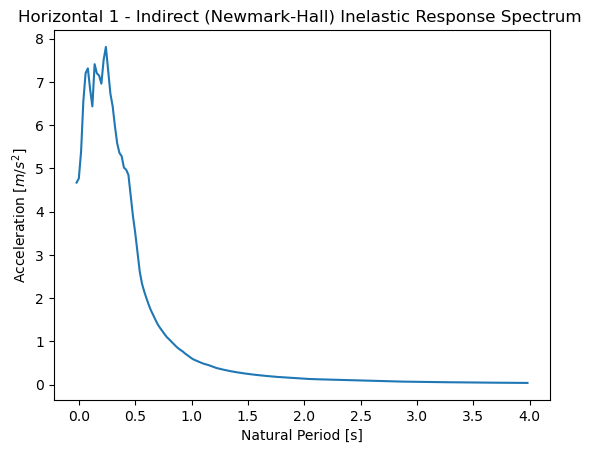

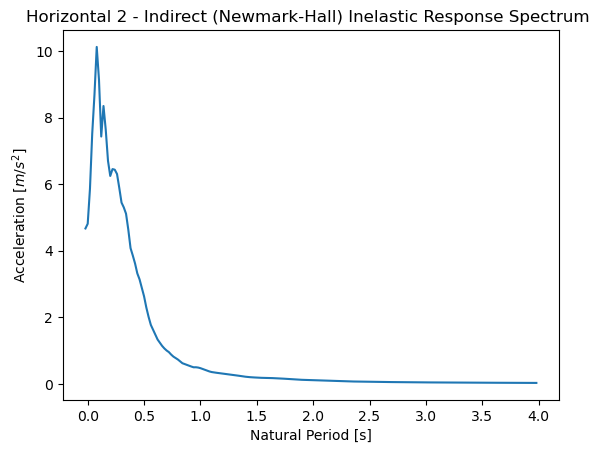

In [20]:
# Directly Import Mean ERS as previously computed
# Note: Mean accelerations are stored in [m/s^2] in the xlsx files. 
df_SA_el_hor1_mean = pd.read_excel('ERS_Means/SA_el_hor1_mean.xlsx', engine='openpyxl')
df_SA_el_hor2_mean = pd.read_excel('ERS_Means/SA_el_hor2_mean.xlsx', engine='openpyxl')
df_SA_el_ver_mean = pd.read_excel('ERS_Means/SA_el_ver_mean.xlsx', engine='openpyxl')

# Create variable from dataframe
SA_el_hor1_mean = df_SA_el_hor1_mean.iloc[:,2]
SA_el_hor2_mean = df_SA_el_hor2_mean.iloc[:,2]

# Compute reduced spectra
SA_in_ind_hor1_mean = np.zeros(201)
SA_in_ind_hor2_mean = np.zeros(201)
for i in range(201):
    SA_in_ind_hor1_mean[i] = SA_el_hor1_mean[i] / Ry[i]
    SA_in_ind_hor2_mean[i] = SA_el_hor2_mean[i] / Ry[i]

plt.plot(Tn,SA_in_ind_hor1_mean)
plt.title("Horizontal 1 - Indirect (Newmark-Hall) Inelastic Response Spectrum ")
plt.xlabel(r'Natural Period [s]')
plt.ylabel(r'Acceleration [$m/s^2$]')
plt.show()

plt.plot(Tn,SA_in_ind_hor2_mean)
plt.title("Horizontal 2 - Indirect (Newmark-Hall) Inelastic Response Spectrum ")
plt.xlabel(r'Natural Period [s]')
plt.ylabel(r'Acceleration [$m/s^2$]')
plt.show()


# Question 2b:

In [ ]:
# Import signals from xlsx as a vector containing multiple dataframes
df_signals = [pd.read_excel(f'Signal/Signal-Set-{i}.xlsx', engine='openpyxl') for i in range(1,6)] 

# Create vectors containing data from dataframes
time_vecs = [i.iloc[:,0] for i in df_signals]      # Time vectors (all equal in principle) - Matrix of dimension 5 (number of signals) x 3440 (number of samples)
acc_hor1_vecs = [i.iloc[:,1] for i in df_signals]  # Horizontal-1 acceleration vectors - Matrix of dimension 5 (number of signals) x 3440 (number of samples)
acc_hor2_vecs = [i.iloc[:,2] for i in df_signals]  # Horizontal-2 acceleration vectors - Matrix of dimension 5 (number of signals) x 3440 (number of samples)
acc_ver_vecs = [i.iloc[:,3] for i in df_signals]   # Vertical acceleration vectors - Matrix of dimension 5 (number of signals) x 3440 (number of samples)

# Set mu for Inelastic Spectrum calculation 
mu = np.max([1.7+0.01*D, 1.7+0.01*F])  #(redefined here for code readability)          

# Horizontal-1 direction
SA_el_hor1_vecs = []
SA_in_dir_hor1_vecs = []
for time, acc in zip(time_vecs,acc_hor1_vecs):
    assert len(time)==len(acc) 
    Dt = time[1]-time[0]
    NPTS = len(time)
    #Compute elastic spectrum
    SA_el, _ = IERS.fnc_Elastic_Response_Spectrum(acc, Dt, NPTS, xi)
    SA_el_hor1_vecs.append (SA_el)
    #Compute inelastic spectrum with direct method
    SA_in_dir = IERS.fnc_Direct_Inel_Resp_Spec(acc,Dt,NPTS,xi,mu,SA_el,F_el);
    SA_in_dir_hor1_vecs.append(SA_in_dir)

SA_in_dir_hor1_mean = np.mean(SA_in_dir_hor1_vecs, axis=0)

# Horizontal-2 direction
SA_el_hor2_vecs = []
SA_in_dir_hor2_vecs = []
for time, acc in zip(time_vecs,acc_hor2_vecs):
    assert len(time)==len(acc) 
    Dt = time[1]-time[0]
    NPTS = len(time)
    #Compute elastic spectrum
    SA_el, _ = IERS.fnc_Elastic_Response_Spectrum(acc, Dt, NPTS, xi)
    SA_el_hor2_vecs.append (SA_el)
    #Compute inelastic spectrum with direct method
    SA_in_dir = IERS.fnc_Direct_Inel_Resp_Spec(acc,Dt,NPTS,xi,mu,SA_el,F_el);
    SA_in_dir_hor2_vecs.append(SA_in_dir)

SA_in_dir_hor2_mean = np.mean(SA_in_dir_hor2_vecs, axis=0)

# Vertical direction
SA_el_ver_vecs = []
SA_in_dir_ver_vecs = []
for time, acc in zip(time_vecs,acc_ver_vecs):
    assert len(time)==len(acc) 
    Dt = time[1]-time[0]
    NPTS = len(time)
    #Compute elastic spectrum
    SA_el, _ = IERS.fnc_Elastic_Response_Spectrum(acc, Dt, NPTS, xi)
    SA_el_ver_vecs.append (SA_el)
    #Compute inelastic spectrum with direct method
    SA_in_dir = IERS.fnc_Direct_Inel_Resp_Spec(acc,Dt,NPTS,xi,mu,SA_el,F_el);
    SA_in_dir_ver_vecs.append(SA_in_dir)

SA_in_dir_ver_mean = np.mean(SA_in_dir_ver_vecs, axis=0)

Calculating for Tn = 0.02
Calculating for Tn = 0.04
Calculating for Tn = 0.06
Calculating for Tn = 0.08
Calculating for Tn = 0.1
Calculating for Tn = 0.12
Calculating for Tn = 0.14
Calculating for Tn = 0.16
Calculating for Tn = 0.18
Calculating for Tn = 0.2
Calculating for Tn = 0.22
Calculating for Tn = 0.24
Calculating for Tn = 0.26
Calculating for Tn = 0.28
Calculating for Tn = 0.3
Calculating for Tn = 0.32
Calculating for Tn = 0.34
Calculating for Tn = 0.36
Calculating for Tn = 0.38
Calculating for Tn = 0.4
Calculating for Tn = 0.42
Calculating for Tn = 0.44
Calculating for Tn = 0.46
Calculating for Tn = 0.48
Calculating for Tn = 0.5
Calculating for Tn = 0.52
Calculating for Tn = 0.54
Calculating for Tn = 0.56
Calculating for Tn = 0.58
Calculating for Tn = 0.6
Calculating for Tn = 0.62
Calculating for Tn = 0.64
Calculating for Tn = 0.66
Calculating for Tn = 0.68
Calculating for Tn = 0.7000000000000001
Calculating for Tn = 0.72
Calculating for Tn = 0.74
Calculating for Tn = 0.76
Calc

In [10]:
# Save processed data to avoid long running times
import pickle

if not os.path.exists("SA_in_dir_vec_stored.pkl"):
    SA_in_dir_vec_stored = [
        SA_in_dir_hor1_vecs, 
        SA_in_dir_hor2_vecs,
        SA_in_dir_ver_vecs
    ]
    pickle.dump(SA_in_dir_vec_stored, open("SA_in_dir_vec_stored.pkl", "wb"))

if not os.path.exists("SA_in_dir_mean_stored.pkl"):
    SA_in_dir_mean_stored = [
        SA_in_dir_hor1_mean, 
        SA_in_dir_hor2_mean,
        SA_in_dir_ver_mean
    ]
    pickle.dump(SA_in_dir_mean_stored, open("SA_in_dir_mean_stored.pkl", "wb"))

In [15]:
# Load processed data from pickle to avoid long running times
# SA_in_dir_vec_store  = pickle.load(open("SA_in_dir_vec_stored.pkl","rb"))
# SA_in_dir_hor1_vecs = SA_in_dir_vec_store[0]
# SA_in_dir_hor2_vecs = SA_in_dir_vec_store[1] 
# SA_in_dir_ver_vecs  = SA_in_dir_vec_store[2]

SA_in_dir_mean_store = pickle.load(open("SA_in_dir_mean_stored.pkl","rb"))
SA_in_dir_hor1_mean = SA_in_dir_mean_store[0]
SA_in_dir_hor2_mean = SA_in_dir_mean_store[1]
SA_in_dir_ver_mean  = SA_in_dir_mean_store[2]

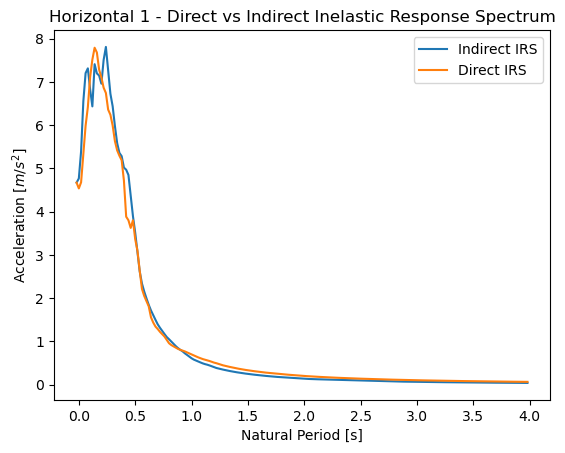

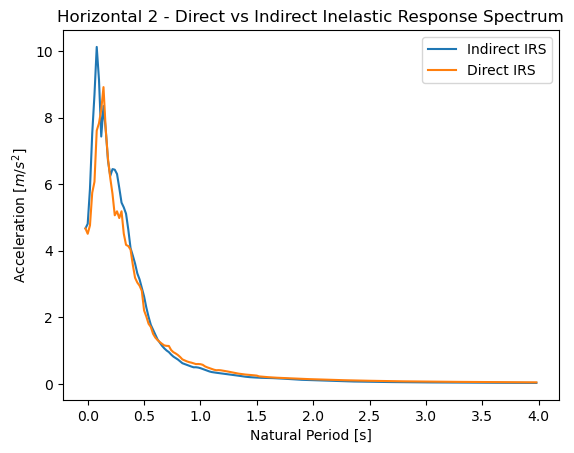

In [21]:
# Plots 

# Horizontal-1 
plt.plot(Tn,SA_in_ind_hor1_mean, label='Indirect IRS')
plt.plot(Tn,SA_in_dir_hor1_mean, label='Direct IRS')
plt.title('Horizontal 1 - Direct vs Indirect Inelastic Response Spectrum')
plt.xlabel('Natural Period [s]')
plt.ylabel(r'Acceleration [$m/s^2$]')
plt.legend()
plt.show()

# Horizontal-2
plt.plot(Tn,SA_in_ind_hor2_mean, label='Indirect IRS')
plt.plot(Tn,SA_in_dir_hor2_mean, label='Direct IRS')
plt.title('Horizontal 2 - Direct vs Indirect Inelastic Response Spectrum')
plt.xlabel('Natural Period [s]')
plt.ylabel(r'Acceleration [$m/s^2$]')
plt.legend()
plt.show()

The two approaches lead to comparable results: as expected, the accelerations similar in magnitude but the curves features differ slightly. The indirect method scales the Elastic Response Spectrum according to the piece-wise Newmark-Hall simplified relation for $R_y$, while the direct method iteratively computes the exact $R_y$ producing an exact constant ductility spectrum. While the overall shape is similar, the two spectra show different (local) troughs and peaks. This is due to $R_y$ being a function of the natural period of the structure for both approaches. It is worth noting that the reduced spectra show a (marginally) different profile compared to each other but also compared to the input ERS (which would be the case if the scaling was linear).

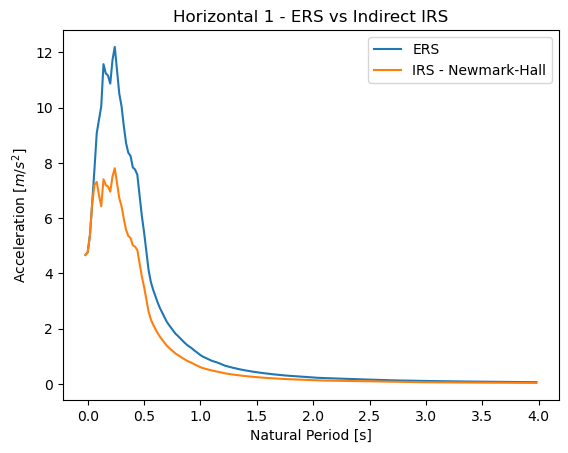

In [22]:
# EXTRA - Comparison between ERS-IRS for Indirect Method

# Horizontal-1 
plt.plot(Tn,SA_el_hor1_mean, label='ERS')
plt.plot(Tn,SA_in_ind_hor1_mean, label='IRS - Newmark-Hall')
plt.title('Horizontal 1 - ERS vs Indirect IRS')
plt.xlabel('Natural Period [s]')
plt.ylabel(r'Acceleration [$m/s^2$]')
plt.legend()
plt.show()



# Questions: 
### General:
- Is a printout of the python notebooks to be considered a report? Should the code be excluded or included in the report?